### 환경생태정보학 8주차
#### 문의 : 조경학과 백시우 seew00@uos.ac.kr

01. 함수 만들기

함수란 입력값에 따라 결과가 다를 수는 있지만, 로직 자체는 동일한 경우 하나의 묶음으로 계속 사용할 수 있게 만들어 놓은 것.

따라서 입력값(x)에 따라 출력값(y)가 달라지는 의무교육 내의 수학에서의 함수 f(X)와 동일한 개념이다.

파이썬에서 함수는 def()로 정의된다.

In [1]:
#파이썬에서 함수의 구조는 다음과 같다
def 함수_이름(변수):
    함수 문장1
    함수 문장2

SyntaxError: invalid syntax (4112642438.py, line 3)

In [2]:
#간단한 예시로 다시 살펴보자
def add_one(a):
    a+1

In [4]:
print(add_one(1))

None


In [8]:
#위에 값이 안나오는 이유는, 함수의 결괏값(=리턴값)을 리턴하라는 명령어가 없기 때문이다. return 을 사용해보자
def add_one(a):
    return a+1

In [6]:
print(add_one(1))

2


In [9]:
#여러가지 변수를 입력할 수 있는 함수를 짜보자
def add_two(a, b):
    return a + b

In [10]:
a = 2
b =3

In [11]:
print(add_two(a, b))

5


In [12]:
#입력 변수가 없는 함수도 존재한다

def say():
    return "Hello"

In [13]:
print(say())

#리턴값을 받을 변수 = 함수_이름()

Hello


In [18]:
#리턴값이 없는 함수도 가능함
def add_text():
    print("%d, %d의 합은 %d입니다." % (a, b, a+b))

In [22]:
print(add_text(1,2))

TypeError: add_text() takes 0 positional arguments but 2 were given

In [23]:
#리턴값이 없는 함수도 가능함
def add_text(a,b):
    print("%d, %d의 합은 %d입니다." % (a, b, a+b))

In [25]:
add_text(3,4)

3, 4의 합은 7입니다.


In [26]:
add_text(1)

TypeError: add_text() missing 1 required positional argument: 'b'

In [27]:
#매개변수를 지정하여 호출해보기
def sub(a,b):
    return a-b

In [28]:
result = sub(a=7, b=3)


In [29]:
print(result)

4


In [30]:
#입력값의 수를 제한두지 않으려면?

def add_many(*args):
    result = 0
    for i in args:
        result = result + i
    return result

In [31]:
result = add_many(1,3,5,7,9)
print(result)

25


In [3]:
#응용해보기

def add_mul(choice, *args):
    if choice == "add":
      result = sum(args)
        # result = 0
        # for i in args:
        #     result = result + i
    elif choice == "mul":
        result = 1
        for i in args:
            result = result * i
    return result

In [4]:
result = add_mul('add', 1,2,3,4,5)
print(result)

15


In [35]:
#키워드 매개변수 kwargs
def print_kwargs(**kwargs):
    print(kwargs)

In [36]:
print_kwargs(a=1)

{'a': 1}


In [37]:
print_kwargs(name='foo',age=3)

{'name': 'foo', 'age': 3}


In [38]:
#리턴값에 대한 이해
def add_and_mul(a,b):
    return a+b, a*b

In [40]:
result = add_and_mul(3,5)
result

(8, 15)

In [41]:
def add_and_mul(a,b):
    return a+b
    return a*b

In [42]:
result = add_and_mul(2,3)
print(result)

5


In [43]:
#매개변수에 초깃값 미리 설정하기

def say_myself(name, age, man=True): 
    print("나의 이름은 %s 입니다." % name) 
    print("나이는 %d살입니다." % age) 
    if man: 
        print("남자입니다.")
    else: 
        print("여자입니다.")


In [44]:
say_myself("박찬", 27, True)


나의 이름은 박찬 입니다.
나이는 27살입니다.
남자입니다.


In [46]:
say_myself("박찬", 27)


나의 이름은 박찬 입니다.
나이는 27살입니다.
남자입니다.


In [47]:
say_myself("박찬", 27,False)


나의 이름은 박찬 입니다.
나이는 27살입니다.
여자입니다.


02. 셀룰러 오토마타 맛보기

https://playgameoflife.com/info

Conway's Game of Life를 시뮬레이션 해보는 Python 코드를 짜보자


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [49]:
n = 100
m = 100


In [50]:
#초기 상태 설정
grid = np.random.choice([0, 1], size=(n, m))


In [59]:
print(grid)

[[1 1 0 ... 1 1 1]
 [0 0 1 ... 1 0 1]
 [1 0 1 ... 1 1 1]
 ...
 [0 0 0 ... 1 0 1]
 [0 1 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]


In [60]:
def update(frameNum, img, grid, n, m):
    newGrid = grid.copy()
    for i in range(n):
        for j in range(m):
            # 각 셀 주변의 살아 있는 이웃 셀 수 계산
            total = int((grid[i, (j-1)%m] + grid[i, (j+1)%m] +
                         grid[(i-1)%n, j] + grid[(i+1)%n, j] +
                         grid[(i-1)%n, (j-1)%m] + grid[(i-1)%n, (j+1)%m] +
                         grid[(i+1)%n, (j-1)%m] + grid[(i+1)%n, (j+1)%m]) / 255)
            # Conway의 규칙에 따라 상태 업데이트
            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON
    img.set_data(newGrid)
    grid[:] = newGrid
    return img

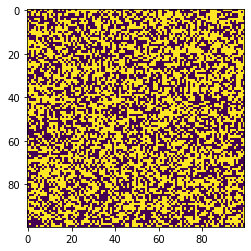

In [62]:
fig, ax = plt.subplots()
img = ax.imshow(grid, interpolation='nearest')
ani = animation.FuncAnimation(fig, update, fargs=(img, grid, n, m), frames=10, interval=50, save_count=50)
plt.show()